# Analyse Exploratoire des Données (EDA)

## Domaine: Marketing

## Quels sont les segments de clients les plus rentables en fonction de leurs interactions avec des campagnes ?

Notre Dataset nommé **marketing_campaign.csv** contients les informations suivantes:

* AcceptedCmp1 - 1 si le client a accepté l'offre lors de la première campagne, 0 sinon
* AcceptedCmp2 - 1 si le client a accepté l'offre lors de la 2e campagne, 0 sinon
* AcceptedCmp3 - 1 si le client a accepté l'offre lors de la 3e campagne, 0 sinon
* AcceptedCmp4 - 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
* AcceptedCmp5 - 1 si le client a accepté l'offre lors de la 5e campagne, 0 sinon
* Réponse (cible) - 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon
* Plainte - 1 si le client s'est plaint au cours des 2 dernières années
* DtCustomer - date d'inscription du client auprès de l'entreprise
* Education - niveau d'éducation du client
* Marital_Status - Statut matrimonial du client
* Kidhome : nombre d'enfants en bas âge dans le ménage du client
* Teenhome - nombre d'adolescents dans le foyer du client
* Income - Revenu annuel du ménage du client
* MntFishProducts - montant dépensé en produits de la pêche au cours des deux dernières années
* MntMeatProducts - montant dépensé pour des produits à base de viande au cours des 2 dernières années
* MntFruits - montant dépensé pour des produits à base de fruits au cours des 2 dernières années
* MntSweetProducts - montant dépensé pour des produits sucrés au cours des 2 dernières années
* MntWines - montant dépensé pour des produits à base de vin au cours des 2 dernières années
* MntGoldProds - montant dépensé pour des produits en or au cours des 2 dernières années
* NumDealsPurchases - nombre d'achats effectués avec des réductions
* NumCatalogPurchases - nombre d'achats effectués à l'aide d'un catalogue
* NumStorePurchases - nombre d'achats effectués directement dans les magasins
* NumWebPurchases - nombre d'achats effectués sur le site web de l'entreprise
* NumWebVisitsMonth - nombre de visites sur le site web de l'entreprise au cours du dernier mois
* Recency - nombre de jours écoulés depuis le dernier achat


## Chargement des données

In [2]:
# Importation de bibliothèques
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Chargement des données
df = pd.read_csv("marketing_campaign.csv", sep=";")

## Vérification et traitement des données

In [4]:
#Afficher les premières lignes
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Information sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Convertir 'Dt_Customer' en format datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

# Vérifier la conversion
df["Dt_Customer"].head()


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [7]:
# Analyse des données manquantes
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

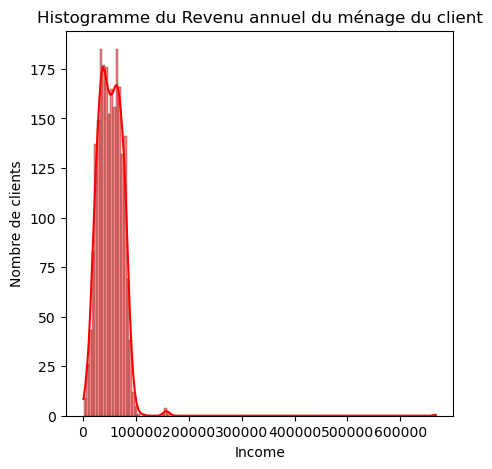

In [8]:
# Analyse de la distribution de la variable "Income"
plt.figure(figsize=(5,5))
sns.histplot(df["Income"], kde=True, color="red")
plt.ylabel("Nombre de clients")
plt.title("Histogramme du Revenu annuel du ménage du client")
plt.show()

En observant l’histogramme,on voit clairement que la variable « Income » (Revenu annuel du ménage du client)
présente une asymétrie à droite. Pour une distribution très asymétrique, la médiane est plus robuste que la moyenne pour une imputation.

In [9]:
# Traitement des données manquantes
# Imputation des valeurs manquantes par la médiane
df['Income'].fillna(df['Income'].median(), inplace=True)

In [10]:
# Vérification des valeurs manqauntes
df['Income'].isnull().sum()

0

In [11]:
# Vérification des doblons 
duplicates = df.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")

Nombre de lignes dupliquées : 0


### Création de variables supplémentaires 

In [12]:
# Création d'une variable indiquant le nombre total d'offres acceptées lors des campagnes
campagne_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCampaigns'] = df[campagne_cols].sum(axis=1)

# Création d'une variable "TotalPurchases" qui correspond au nombre total d'achats sur les differents canaux
achat_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[achat_cols].sum(axis=1)

# Création d'une variable "TotalAmountSpent" qui correspond au montant total dépensé sur les différents produits
depense_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalAmountSpent'] = df[depense_cols].sum(axis=1)

# Afficher un aperçu des nouvelles colonnes
print(df[['TotalAcceptedCampaigns', 'TotalPurchases', 'TotalAmountSpent']].head())


   TotalAcceptedCampaigns  TotalPurchases  TotalAmountSpent
0                       0              25              1617
1                       0               6                27
2                       0              21               776
3                       0               8                53
4                       0              19               422


In [18]:
# Calcul de l'âge des clients à partir de l'année de naissance 'Year_Birth'
# On utilise l'année courante pour faire la différence
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']

# Affichage des 5 premières lignes pour vérifier le calcul
print(df[['Year_Birth', 'Age']].head())


   Year_Birth  Age
0        1957   68
1        1954   71
2        1965   60
3        1984   41
4        1981   44


In [14]:
# Statistique descriptive
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAcceptedCampaigns,TotalPurchases,TotalAmountSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.297768,14.862054,605.798214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,8.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,15.000000,396.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,21.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,4.000000,44.000000,2525.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.678381,7.677173,602.249288


## EDA

### Analyse Univariée

#### Distribution des variables quantitatives

Histogrammes

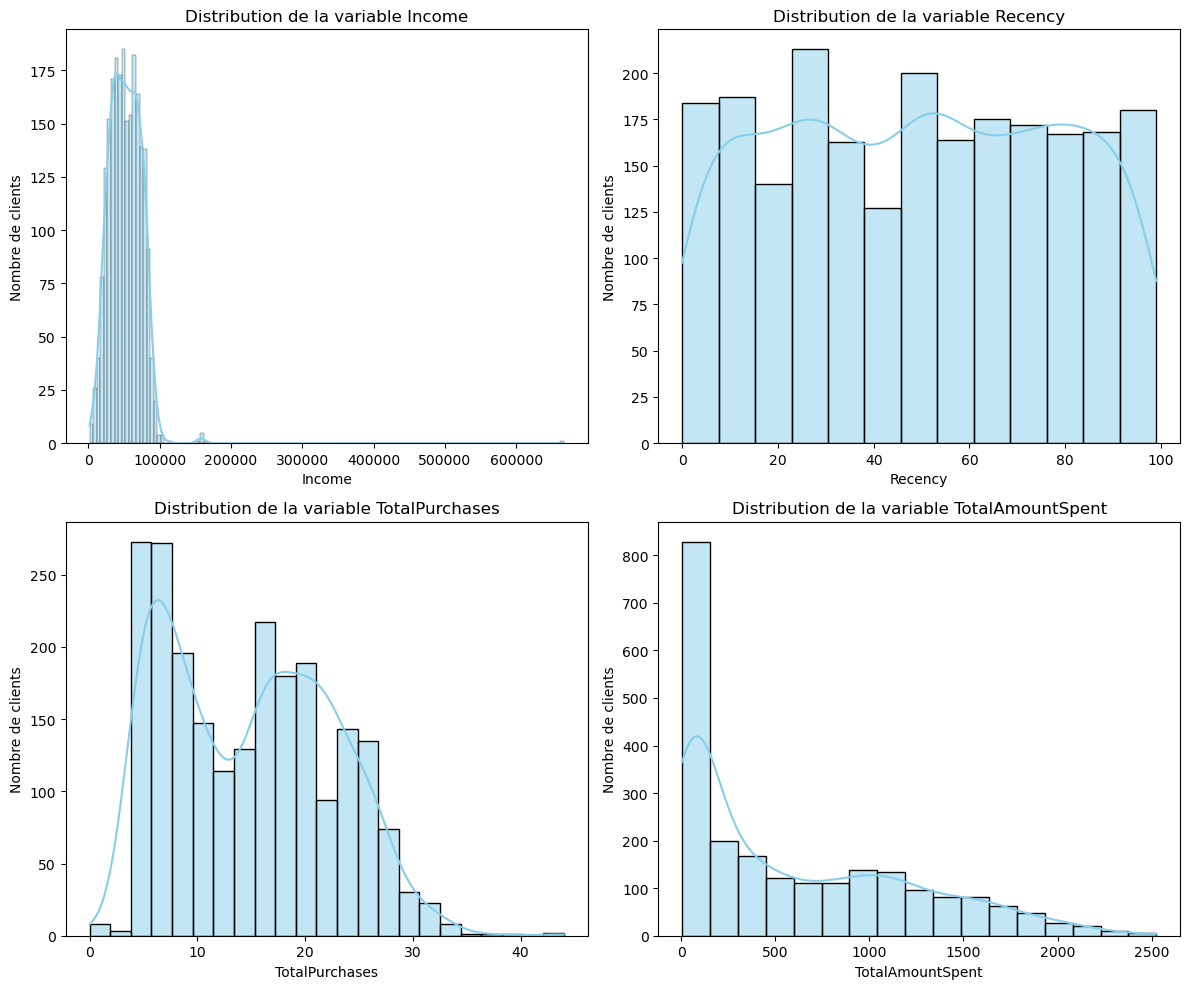

In [19]:
# Histogrammes pour quelques variables importantes
variables_quanti = ['Income', 'Recency', 'TotalPurchases', 'TotalAmountSpent']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for var, ax in zip(variables_quanti, axes.flatten()):
    sns.histplot(df[var], kde=True, ax=ax, color='skyblue')
    ax.set_ylabel("Nombre de clients")
    ax.set_title(f'Distribution de la variable {var}')
plt.tight_layout()
plt.show()


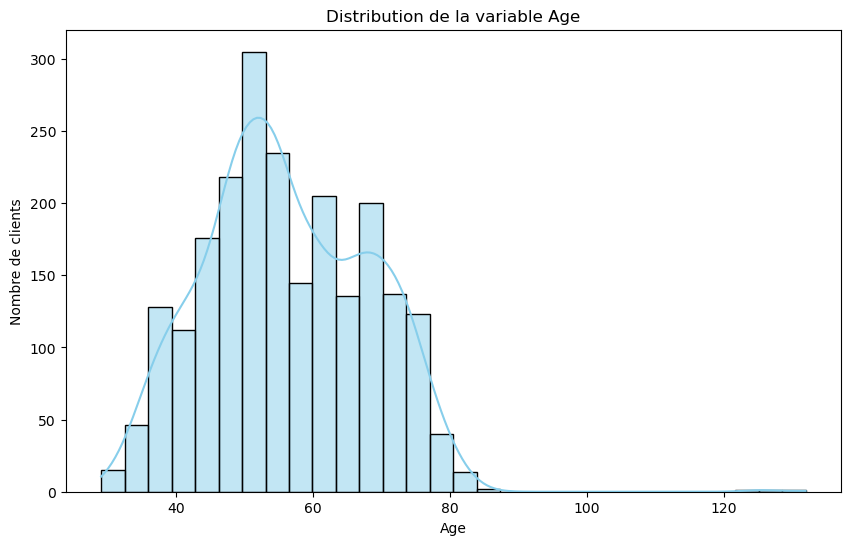

In [25]:
# Histogramme pour la variable "Age"
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color="skyblue")
plt.title("Distribution de la variable Age")
plt.xlabel("Age")
plt.ylabel("Nombre de clients")
plt.show()

Boîtes à moustaches ou boxplots

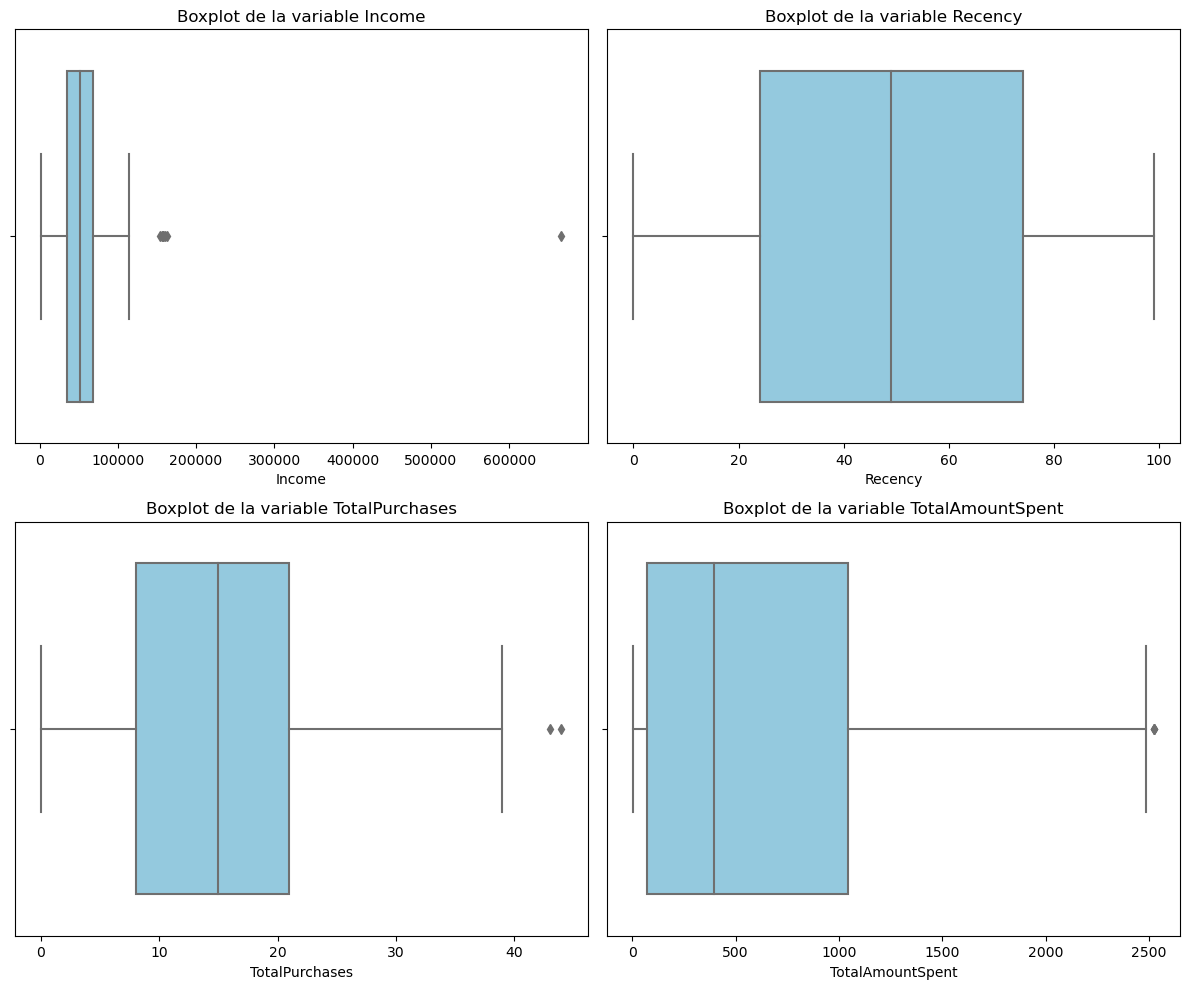

In [26]:
# Boxplots pour visualiser les outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for var, ax in zip(variables_quanti, axes.flatten()):
    sns.boxplot(x=df[var], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot de la variable {var}')
plt.tight_layout()
plt.show()


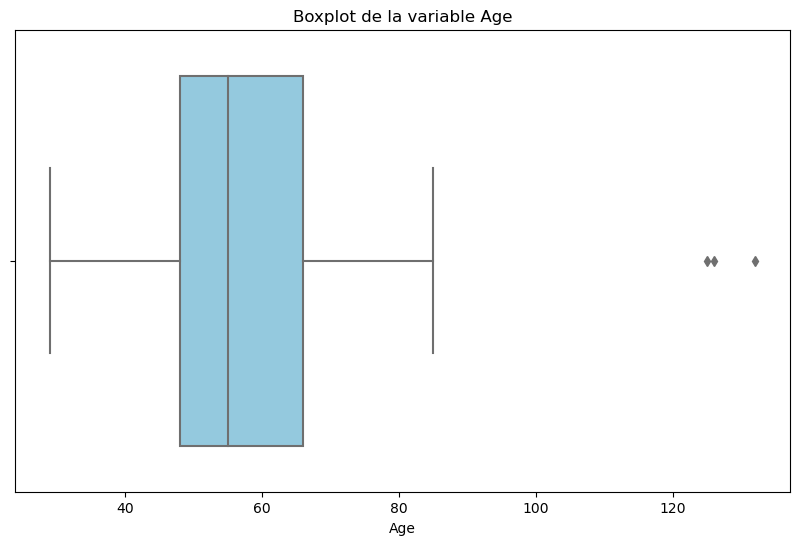

In [27]:
# Boxplot pour visualiser les outliers la variable "Age"
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Age"], color="skyblue")
plt.title("Boxplot de la variable Age")
plt.xlabel("Age")
plt.show()

#### Visualisation des variables catégorielles

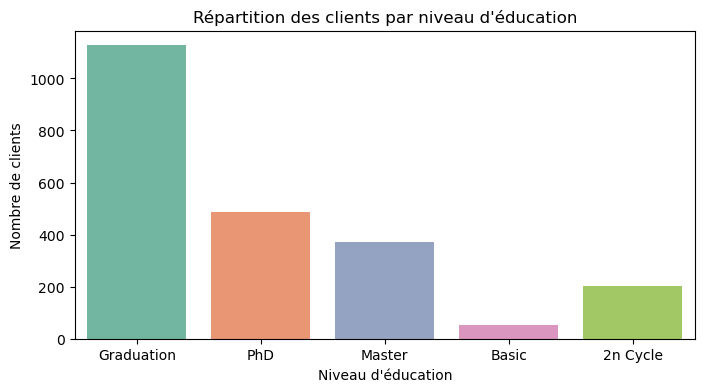

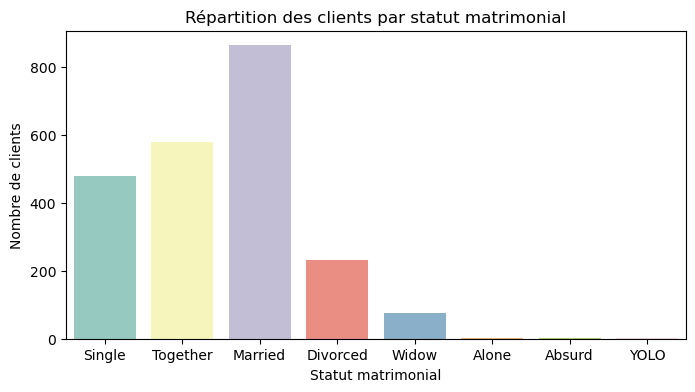

In [29]:
# Barplot pour la variable "Education"
plt.figure(figsize=(8, 4))
sns.countplot(x='Education', data=df, palette='Set2')
plt.title("Répartition des clients par niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de clients")         
plt.show()

# Barplot pour le statut "Marital_Status"
plt.figure(figsize=(8, 4))
sns.countplot(x='Marital_Status', data=df, palette='Set3')
plt.title("Répartition des clients par statut matrimonial")
plt.xlabel("Statut matrimonial")
plt.ylabel("Nombre de clients") 
plt.show()


### Analyse Bivariée

#### Qualitative vs Quantitative

#### Boxplot

Relation entre le montant total dépensé et le nombre de campagnes acceptées

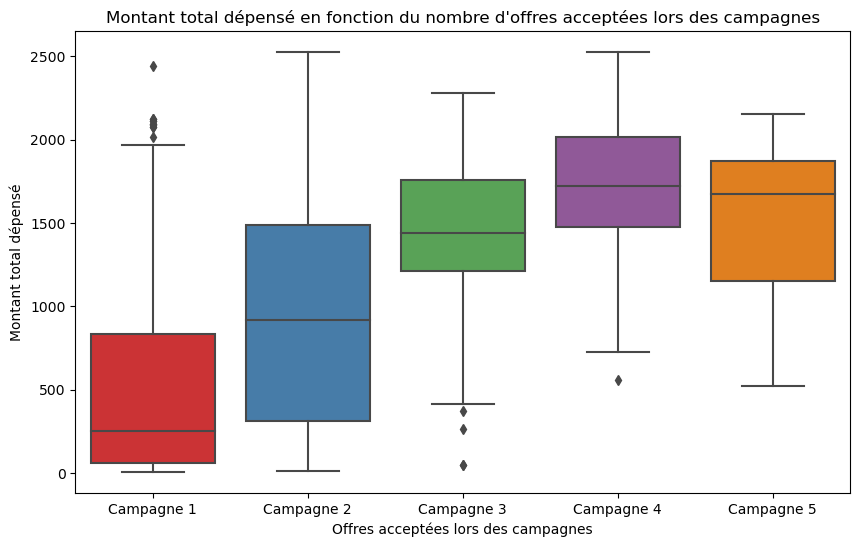

In [30]:
# "TotalAcceptedCampaigns" vs "TotalAmountSpent" 
# Remplacement des valeurs numériques par des labels plus explicites
df['Campagne_Acceptee'] = df['TotalAcceptedCampaigns'].map({
    0: "Campagne 1",
    1: "Campagne 2",
    2: "Campagne 3",
    3: "Campagne 4",
    4: "Campagne 5"
})
    
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campagne_Acceptee', y='TotalAmountSpent', data=df, palette='Set1')
plt.title("Montant total dépensé en fonction du nombre d'offres acceptées lors des campagnes")
plt.xlabel("Offres acceptées lors des campagnes")
plt.ylabel("Montant total dépensé")
plt.show()


Relation entre le montant total dépensé et le niveau d'éducation du client

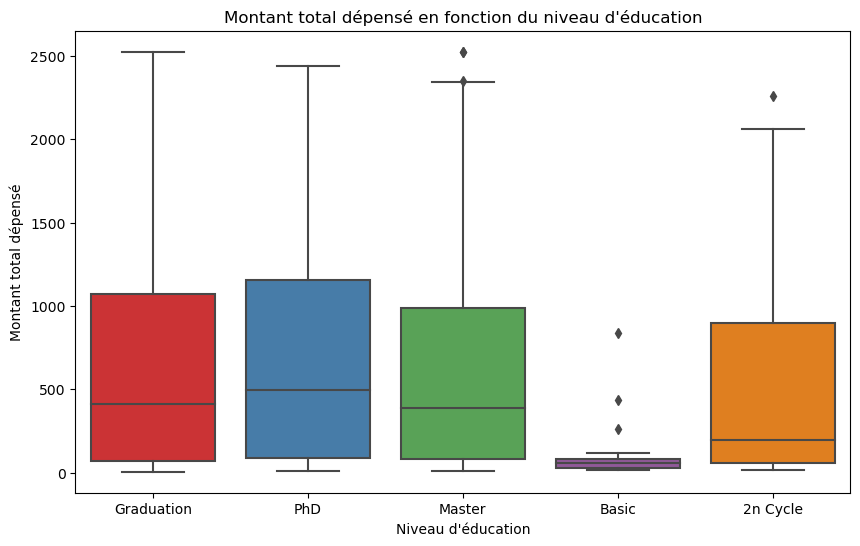

In [31]:
# "Education" vs "TotalAmountSpent" 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalAmountSpent', data=df, palette='Set1')
plt.title("Montant total dépensé en fonction du niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Montant total dépensé")
plt.show()

Relation entre le montant total dépensé et le statut matrimonial du client

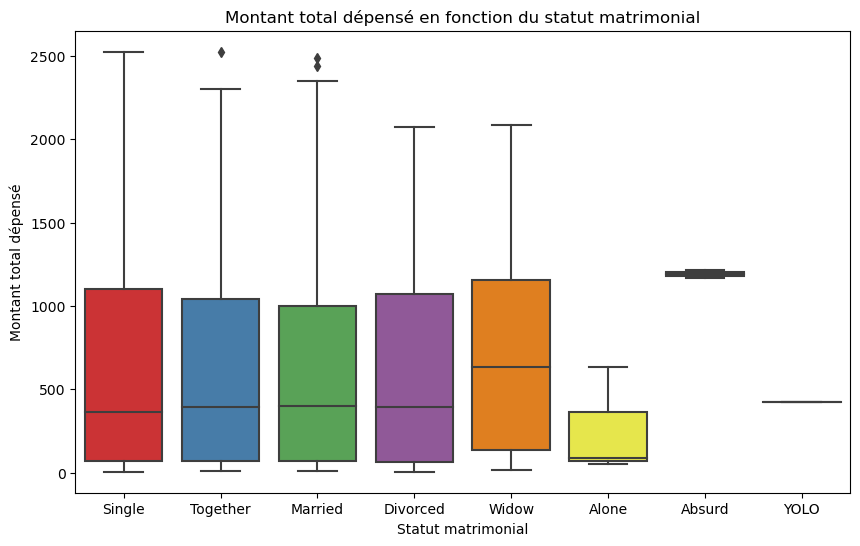

In [32]:
# "Marital_Status" vs "TotalAmountSpent" 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='TotalAmountSpent', data=df, palette='Set1')
plt.title("Montant total dépensé en fonction du statut matrimonial")
plt.xlabel("Statut matrimonial")
plt.ylabel("Montant total dépensé")
plt.show()

#### Quantitative vs Quantitative

 #### Scatter plots

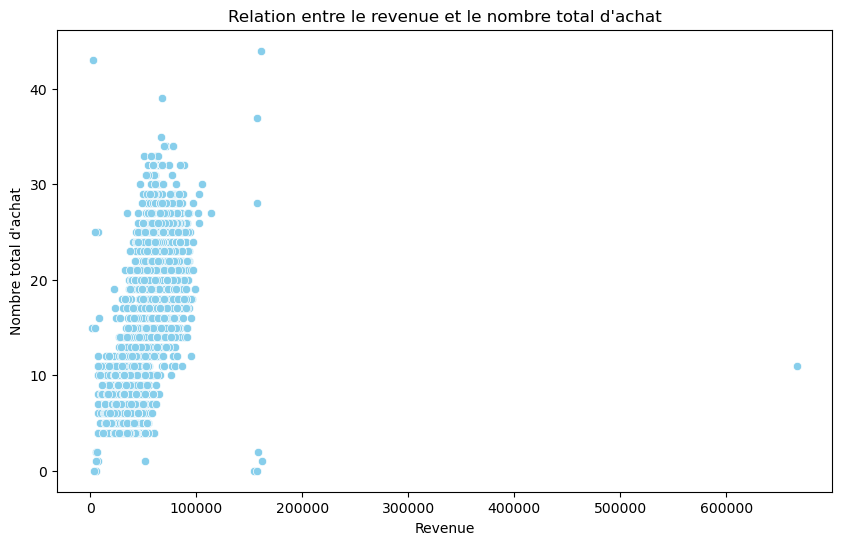

In [33]:
# Relation entre le revenue et le nombre total d'achat
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Income", y="TotalPurchases", data=df, color="skyblue")
plt.title("Relation entre le revenue et le nombre total d'achat")
plt.xlabel("Revenue" )
plt.ylabel("Nombre total d'achat")
plt.show()

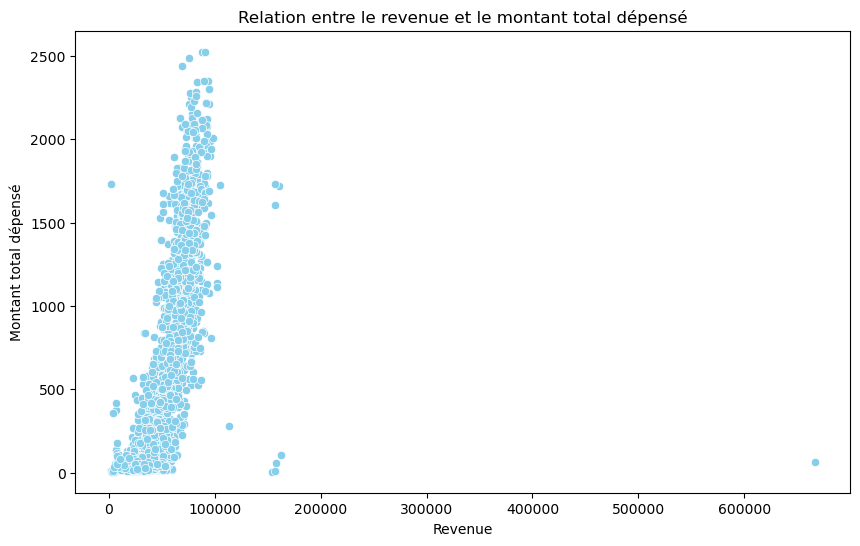

In [34]:
# Relation entre le revenue et le montant total dépensé
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Income", y="TotalAmountSpent", data=df, color="skyblue")
plt.title("Relation entre le revenue et le montant total dépensé")
plt.xlabel("Revenue" )
plt.ylabel("Montant total dépensé")
plt.show()

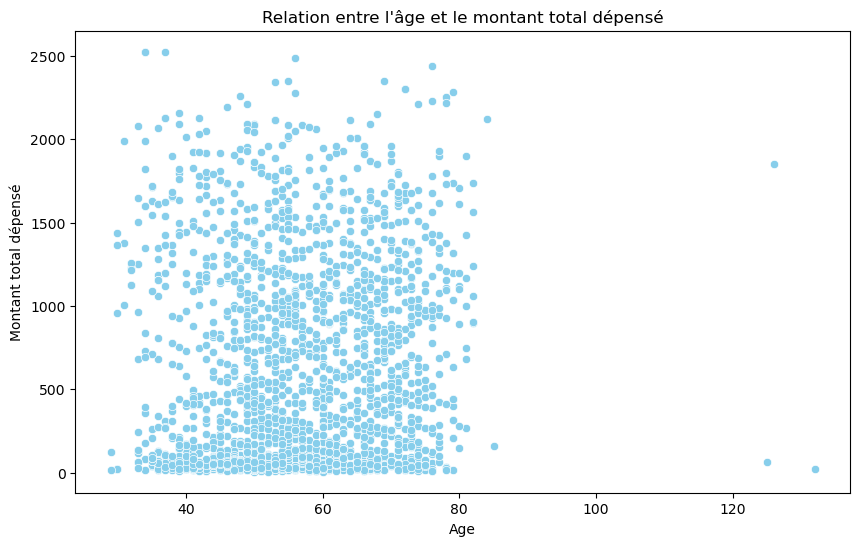

In [37]:
# Relation entre l'âge et le montant total dépensé
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="TotalAmountSpent", data=df, color="skyblue")
plt.title("Relation entre l'âge et le montant total dépensé")
plt.xlabel("Age" )
plt.ylabel("Montant total dépensé")
plt.show()

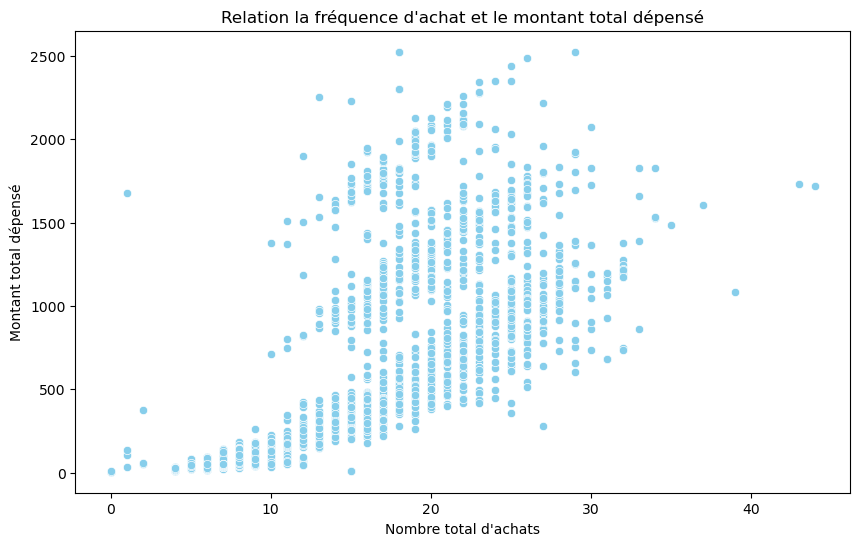

In [38]:
# Relation entre la fréquence d'achat et le montant total dépensé
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalPurchases", y="TotalAmountSpent", data=df, color="skyblue")
plt.title("Relation la fréquence d'achat et le montant total dépensé")
plt.xlabel("Nombre total d'achats" )
plt.ylabel("Montant total dépensé")
plt.show()


### Analyse Multivariée

#### Matrice de corrélation et Heatmap

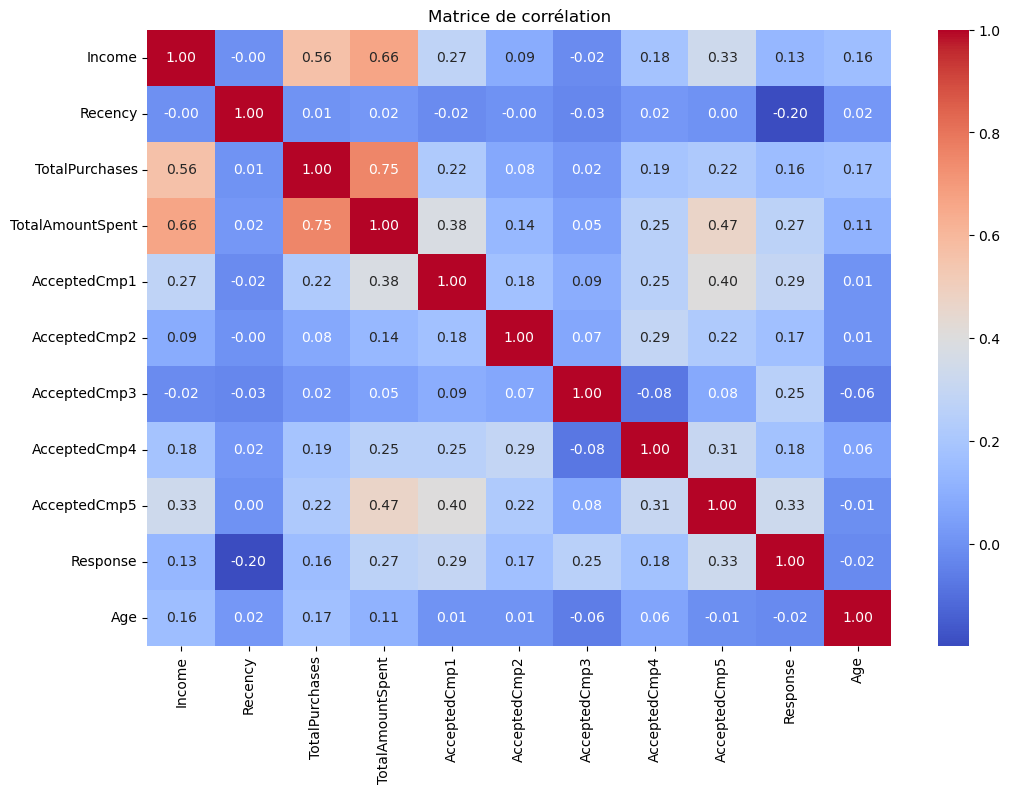

In [39]:
# Sélectionner les variables numériques pertinentes pour la corrélation
cols_corr = ['Income', 'Recency', 'TotalPurchases', 'TotalAmountSpent'] + campagne_cols + ['Response'] + ['Age']
corr_matrix = df[cols_corr].corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


## Indicateurs et segmentation

### Taux d'acceptation d'offre par campagne

In [40]:
# calcul du nombre d'offre acceptée par les clients lors des différentes campagnes
campagne_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for i, campagne in enumerate(campagne_cols, start=1):
    nb_clients = df[campagne].sum()
    print(f"Nombre de clients ayant acceptés l'offre lors de la Campagne {i}: {nb_clients}")


Nombre de clients ayant acceptés l'offre lors de la Campagne 1: 144
Nombre de clients ayant acceptés l'offre lors de la Campagne 2: 30
Nombre de clients ayant acceptés l'offre lors de la Campagne 3: 163
Nombre de clients ayant acceptés l'offre lors de la Campagne 4: 167
Nombre de clients ayant acceptés l'offre lors de la Campagne 5: 163


In [41]:
# Calcul du nombre total de clients
total_clients = df['ID'].nunique() 

# Calcul du taux d'acceptation d'offre par campagne
for i, campagne in enumerate(campagne_cols, start=1):
    taux_par_campagne = (df[campagne] > 0).sum() / total_clients * 100
    print(f"Taux d'acceptation de l'offre lors de la Campagne {i}: {taux_par_campagne:.2f}%")

Taux d'acceptation de l'offre lors de la Campagne 1: 6.43%
Taux d'acceptation de l'offre lors de la Campagne 2: 1.34%
Taux d'acceptation de l'offre lors de la Campagne 3: 7.28%
Taux d'acceptation de l'offre lors de la Campagne 4: 7.46%
Taux d'acceptation de l'offre lors de la Campagne 5: 7.28%


### Taux d'acceptation global et taux de convertion

In [42]:
# Nombre total de clients
total_clients = df['ID'].nunique() 
print(f"Nombre total de clients : {total_clients}")
      
# Calcul du taux d'acceptation global (au moins une offre acceptée)
taux_global = (df['TotalAcceptedCampaigns'] > 0).sum() / total_clients * 100
print(f"Taux d'acceptation global (au moins une campagne acceptée) : {taux_global:.2f}%")

# Calcul du taux de conversion de la dernière campagne (variable Response)
taux_response = df['Response'].sum() / total_clients * 100
print(f"Taux de conversion de la dernière campagne : {taux_response:.2f}%")


Nombre total de clients : 2240
Taux d'acceptation global (au moins une campagne acceptée) : 20.67%
Taux de conversion de la dernière campagne : 14.91%


### Segmentation par profil

In [43]:
# -Segmentation par tranche d'âge 
# Définir des intervalles d'âge
bins_age = [0, 30, 45, 60, 100]
labels_age = ['<30', '30-45', '45-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Segmentation par niveau de revenu
# Utiliser des quantiles pour créer des groupes de revenus (4 groupes)
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [44]:
from tabulate import tabulate

# Calcul des indicateurs d'acceptation des offres par segment 
#   - Nombre total de clients dans le segment
#   - Taux de conversion de la dernière campagne (Response)
#   - Montant total dépensé par segment
grouped = df.groupby(['Age_Group', 'Income_Group']).agg(
    Total_Customers=('ID', 'count'),
    Conversion_Rate=('Response', lambda x: x.sum() / x.count() * 100),
    Total_Amount=('TotalAmountSpent', 'sum')
).reset_index()

# Affichage des résultats
print("Analyse de l'acceptation des offres par segment (Âge et Revenu) :")
print(tabulate(grouped, headers='keys', tablefmt='fancy_grid', numalign="center"))

Analyse de l'acceptation des offres par segment (Âge et Revenu) :
╒════╤═════════════╤════════════════╤═══════════════════╤═══════════════════╤════════════════╕
│    │ Age_Group   │ Income_Group   │  Total_Customers  │  Conversion_Rate  │  Total_Amount  │
╞════╪═════════════╪════════════════╪═══════════════════╪═══════════════════╪════════════════╡
│ 0  │ <30         │ Low            │         2         │        50         │      138       │
├────┼─────────────┼────────────────┼───────────────────┼───────────────────┼────────────────┤
│ 1  │ <30         │ Medium         │         0         │        nan        │       0        │
├────┼─────────────┼────────────────┼───────────────────┼───────────────────┼────────────────┤
│ 2  │ <30         │ High           │         0         │        nan        │       0        │
├────┼─────────────┼────────────────┼───────────────────┼───────────────────┼────────────────┤
│ 3  │ <30         │ Very High      │         0         │        nan        │  

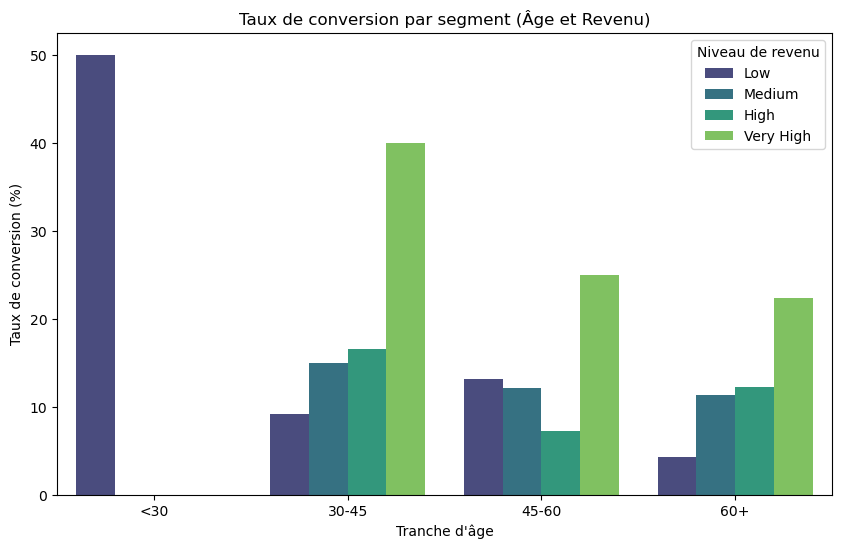

In [45]:
# Visualisation des segments (taux de conversion)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age_Group', y='Conversion_Rate', hue='Income_Group', palette='viridis')
plt.title("Taux de conversion par segment (Âge et Revenu)")
plt.xlabel("Tranche d'âge")
plt.ylabel("Taux de conversion (%)")
plt.legend(title="Niveau de revenu")
plt.show()

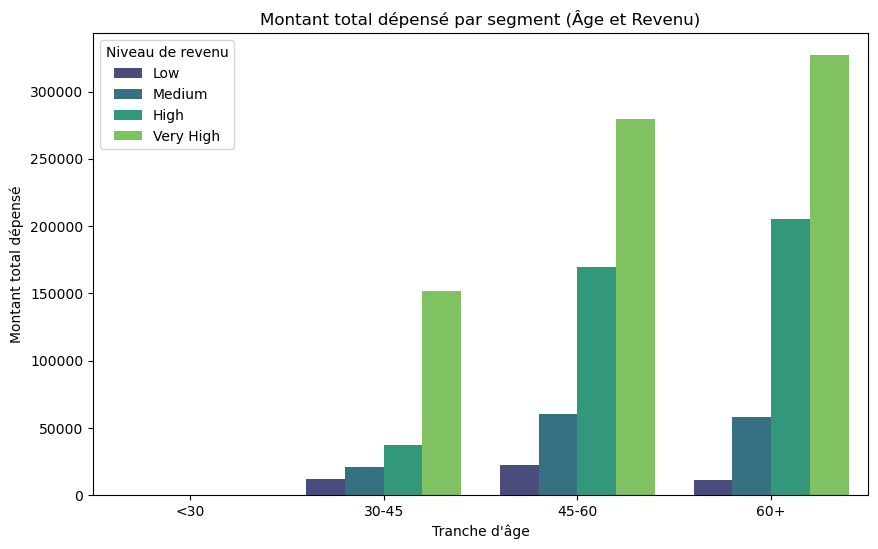

In [46]:
# Visualisation des segments (dépense)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age_Group', y='Total_Amount', hue='Income_Group', palette='viridis')
plt.title("Montant total dépensé par segment (Âge et Revenu)")
plt.xlabel("Tranche d'âge")
plt.ylabel("Montant total dépensé")
plt.legend(title="Niveau de revenu")
plt.show()